In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, t
import riskmgmlib as rml

In [68]:
#Problem 1
#Use the data in problem1.csv.  Fit a Normal Distribution and a Generalized T distribution to this data. 
#Calculate the VaR and ES for both fitted distributions.

data = pd.read_csv('problem1.csv')
data.head()

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


In [69]:
# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Fit a t distribution to the data:
df, loc, scale = t.fit(data)

In [70]:
n = 10000
normal_data = norm.rvs(mu, std, size=n)
t_data = t.rvs(df, loc, scale, size=n)

In [71]:
# Calculate VaR for both distributions:
normal_var = rml.calculate_var(normal_data)
t_var = rml.calculate_var(t_data)

In [72]:
def calculate_es(data, mean = 0, alpha=0.05):
    return -np.mean(data[data<-rml.calculate_var(data, mean, alpha)])

In [73]:
# Calculate ES for both distributions:
normal_es = calculate_es(normal_data)
t_es = calculate_es(t_data)

In [76]:
xnorm = np.linspace(-0.5, 0.5, num=100)
pdf = norm.pdf(xnorm, mu, std)

xnorm = np.linspace(-0.5, 0.5, num=100)
pdft = t.pdf(xnorm, df, loc, scale)

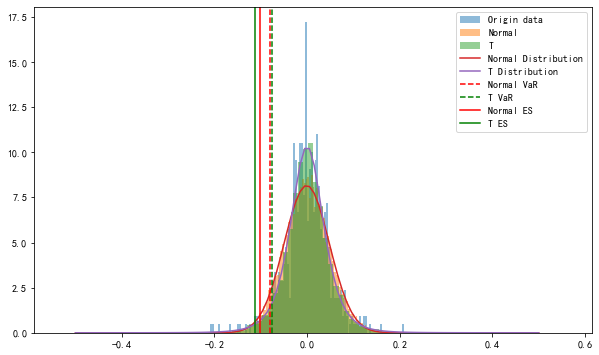

In [77]:
plt.figure(figsize=(10,6))
plt.hist(data, bins=100, density=True, alpha=0.5, label='Origin data')
plt.hist(normal_data, bins=100, density=True, alpha=0.5, label='Normal')
plt.hist(t_data, bins=100, density=True, alpha=0.5, label='T')
plt.plot(xnorm, pdf, label = 'Normal Distribution')
plt.plot(xnorm, pdft, label = 'T Distribution')
plt.axvline(-normal_var, color='r', linestyle='--', label='Normal VaR')
plt.axvline(-t_var, color='g', linestyle='--', label='T VaR')
plt.axvline(-normal_es, color='r', linestyle='-', label='Normal ES')
plt.axvline(-t_es, color='g', linestyle='-', label='T ES')
plt.legend()
plt.show()

In [2]:
#Problem 2
data = pd.read_csv("DailyPrices.csv", index_col=0)
#1. Covariance estimation techniques.
weights = rml.weight_gen(len(data.iloc[:,0]), 0.94)
print(weights.shape)
cov = rml.ewcov_gen(data, weights)
print(cov.shape)

(249,)
(100, 100)


In [3]:
#2. Non PSD fixes for correlation matrices
n = 500
sigma = np.matrix(np.full((n, n), 0.9))
np.fill_diagonal(sigma, 1)
sigma[0, 1] = 0.7357
sigma[1, 0] = 0.7357

near_psd_matrix = rml.near_psd(sigma)
print(rml.is_psd(near_psd_matrix))
higham_psd_matrix = rml.Higham_method(sigma)
print(rml.is_psd(higham_psd_matrix))


True
True


In [6]:
#3. Simulation Methods
direct_sim = rml.sim_mvn_from_cov(cov)
print(direct_sim.shape)
pca_sim = rml.PCA_with_percent(cov)
print(pca_sim.shape)

(100, 25000)
(100, 25000)


In [3]:
#4. VaR calculation methods (all discussed)
samplePrice = data.iloc[:,0]
samplereturn = rml.return_calculate(samplePrice)
samplereturn = samplereturn - np.mean(samplereturn)

print(rml.calculate_var(samplereturn))
print(rml.normal_var(samplereturn))
print(rml.ewcov_normal_var(samplereturn))
print(rml.t_var(samplereturn))
print(rml.historic_var(samplereturn))

0.026494622000999415
0.024982712591409068
0.024603334755427
0.024622680568166716
0.026494622000999415


In [4]:
#5. ES calculation
es = rml.calculate_es(samplereturn)
print(es)

0.0334133178127693


In [10]:
# Problem 3

# Use your repository from #2.
# Using Portfolio.csv and DailyPrices.csv.  Assume the expected return on all stocks is 0.
# This file contains the stock holdings of 3 portfolios.  You own each of these portfolios.
# Fit a Generalized T model to each stock and calculate the VaR and ES of each portfolio as well as your
# total VaR and ES.  Compare the results from this to your VaR form Problem 3 from Week 4.

In [64]:
portfolio = pd.read_csv("Portfolio.csv")
dailyPrice = pd.read_csv("DailyPrices.csv", index_col=0)

In [6]:
# Calculate the return of each stock
return_data = pd.DataFrame()
for i in range(len(dailyPrice.columns)):
    return_data[dailyPrice.columns[i]] = rml.return_calculate(dailyPrice.iloc[:,i])

return_data.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
1,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
2,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
3,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
4,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605


In [65]:
total_holdings = portfolio.groupby('Stock').sum('Holding')
total_holdings['Portfolio'] = 'Total'
total_holdings = total_holdings.reset_index()
portfolio = portfolio.append(total_holdings)
portfolio.head()

,Portfolio,Stock,Holding
0,A,AAPL,58
1,A,TSLA,10
2,A,JPM,64
3,A,HD,27
4,A,BAC,209


In [66]:
portfolio.tail()

,Portfolio,Stock,Holding
94,Total,VZ,188
95,Total,WFC,173
96,Total,WMT,69
97,Total,XOM,140
98,Total,ZTS,49


In [11]:
t_param={}
sim_data=[]
for col in return_data:
    stock_return = return_data[col]
    stock_return = stock_return - np.mean(stock_return)
    df, loc, scale = t.fit(stock_return)
    t_param[col] = [df, loc, scale]
    sim_data.append(t.rvs(df, loc, scale, size=10000))

sim_data = np.array(sim_data)

In [51]:
sim_returns = pd.DataFrame(columns=return_data.columns, data=sim_data.T)
sim_returns.shape

(10000, 100)

In [67]:
# for simulated data based on t distribution
current_prices = pd.DataFrame({"Price": dailyPrice.iloc[-1]})

for portfolio_index, port in portfolio.groupby('Portfolio'):
    port = port.set_index('Stock')
    port = port.join(current_prices.loc[port.index])
    sim_return = sim_returns[port.index]
    sim_prices_change = sim_return * port['Price'].T
    sim_values_change = sim_prices_change @ port['Holding']

    sim_var = rml.calculate_var(sim_values_change)
    sim_es = rml.calculate_es(sim_values_change)
    print(f"Portfolio {portfolio_index} " + "VaR: " + str(sim_var))
    print(f"Portfolio {portfolio_index} " + "ES: " + str(sim_es))
    print(" ")
      

Portfolio A VaR: 1929.25952517092
Portfolio A ES: 2465.613792616551
 
Portfolio B VaR: 1850.7786582160106
Portfolio B ES: 2329.3313903687117
 
Portfolio C VaR: 1608.301590780635
Portfolio C ES: 2048.854880289214
 
Portfolio Total VaR: 3129.907980828132
Portfolio Total ES: 3915.3366517379905
 
